In [69]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Import Data

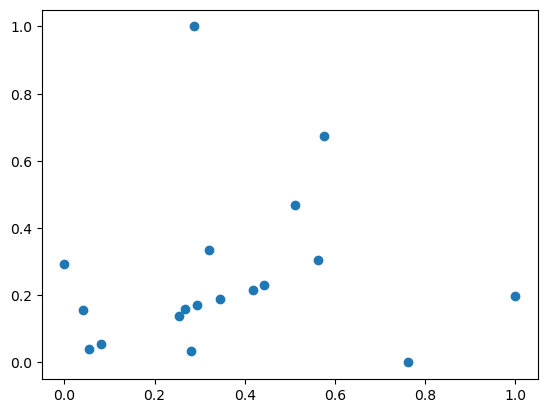

In [96]:
data = pd.read_csv('clustering.csv', delimiter=';', decimal=',')

time = data['time']
jerk = data['mean_jerk_vector']
gender = data['gender']

clustering = [[t, j] for t, j in zip(time, jerk)]
data = np.array(clustering)
plt.scatter(data[:,0],data[:,1])

# K Means

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 0 1 2 1 1 1 0 1 0 0 2 1 1 0 0 1 1]


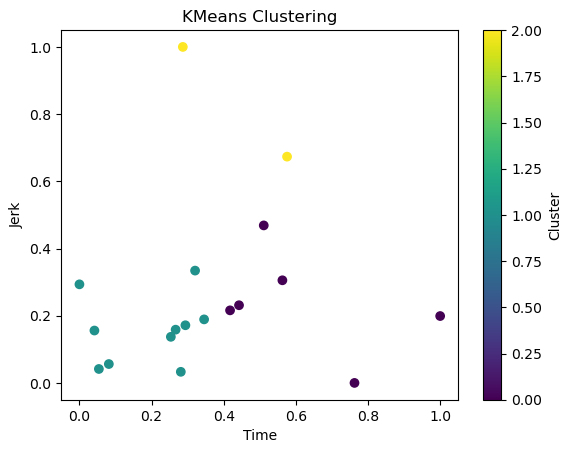

In [99]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(data)
print(kmeans.labels_)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Jerk')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

Calculate gender based climbers per cluster and plot the clusters with the gender information

Cluster 0: 3 females, 3 males
Cluster 1: 5 females, 5 males
Cluster 2: 1 females, 1 males


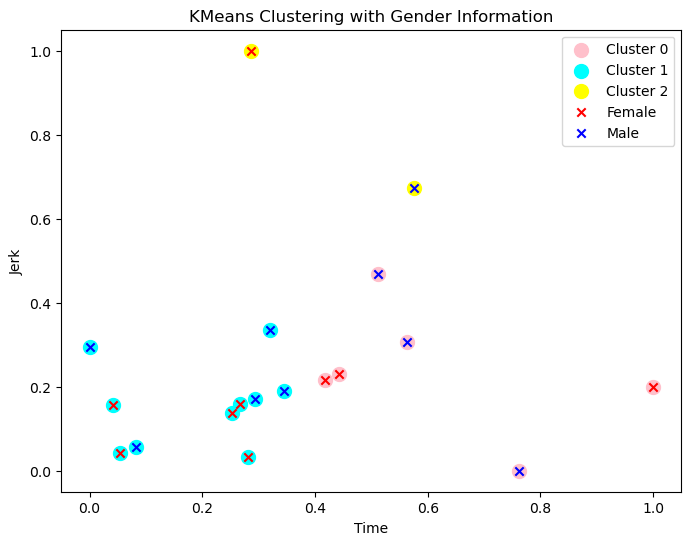

In [101]:
# Gender based counting per cluster
female_counts = {}
male_counts = {}

# Iterate over each cluster
for cluster_label in range(3):
    cluster_data = data[kmeans.labels_ == cluster_label]
    
    female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
    male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))

# Print
for cluster_label in range(3):
    print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

# Plot
colors = ['pink', 'cyan', 'yellow']
plt.figure(figsize=(8, 6))
for cluster_label in range(3):
    cluster_data = data[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

# Plot females as red crosses
plt.scatter(data[(gender == 0), 0], data[(gender == 0), 1], c='red', marker='x', label='Female')

# Plot males blue crosses
plt.scatter(data[(gender == 1), 0], data[(gender == 1), 1], c='blue', marker='x', label='Male')

plt.xlabel('Time')
plt.ylabel('Jerk')
plt.title('KMeans Clustering with Gender Information')
plt.legend()
plt.show()

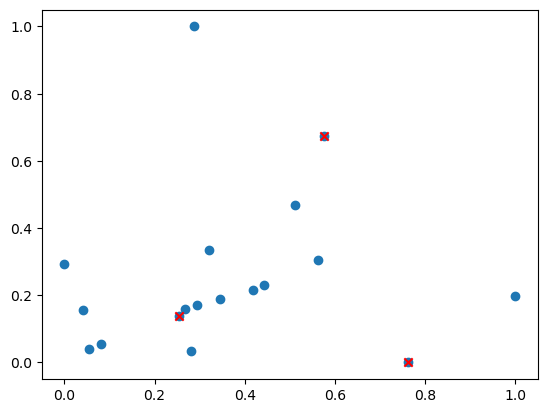

In [63]:
#Anzahl der gewünschten Cluster
n = 3

# Nehme n zufällige Punkte aus dem Array als Startmittelpunkte (hier die ersten 5)
centroids = data[np.random.randint(0,len(data), size=n)]
plt.scatter(data[:,0],data[:,1])
plt.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = 'x')

In [64]:
def dist(P1, P2):
    return np.linalg.norm(P1-P2)**2

def dist_matrix(data, centroids):
    l = data.shape[0]
    distance = np.zeros((l,n))

    for i in range(l):
        for j in range(n):
            distance[i,j] = dist(data[i], centroids[j])
    return distance

def new_centroids(data, cluster, n):
    centroids = np.zeros((n,2))
    for i in range(n):
        centroids[i] = np.mean(data[np.where(cluster==i)], axis = 0)
    return centroids

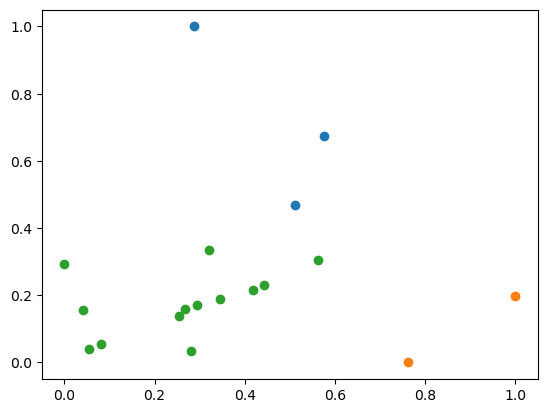

In [65]:
distance = dist_matrix(data, centroids)
cluster = np.argmin(distance, axis=1)

for i in range(n):
    plot_data = data[np.where(cluster==i)]
    plt.scatter(plot_data[:,0],plot_data[:,1])

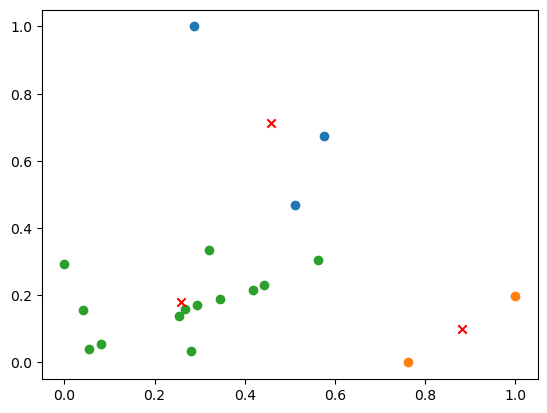

In [66]:
centroids = new_centroids(data, cluster, n)

for i in range(n):
    plot_data = data[np.where(cluster==i)]
    plt.scatter(plot_data[:,0],plot_data[:,1])
plt.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = 'x')

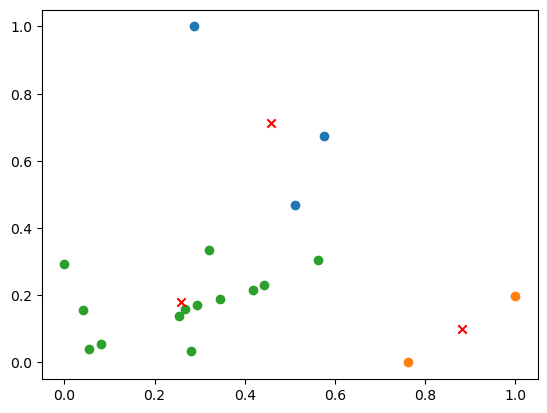

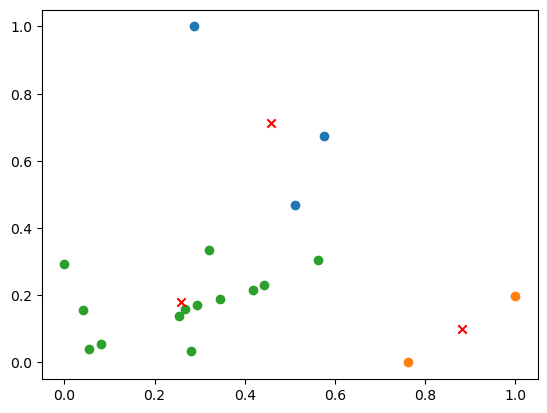

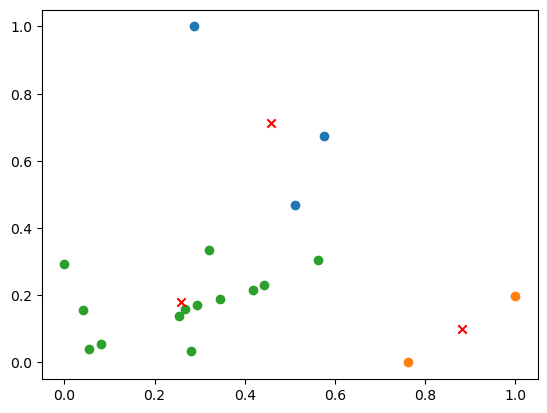

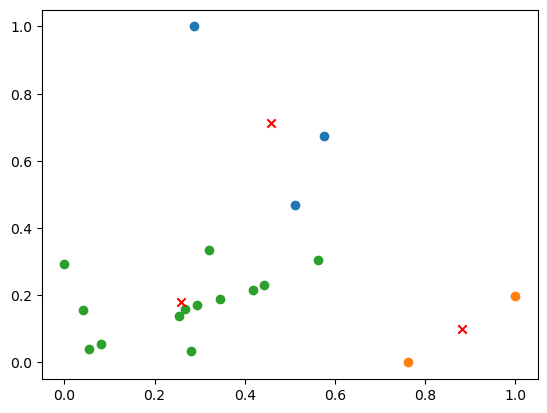

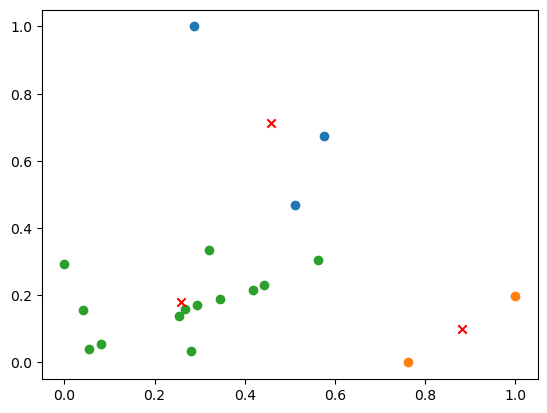

In [67]:
for i in range(5):
    distance = dist_matrix(data, centroids)
    cluster = np.argmin(distance, axis=1)
    centroids = new_centroids(data, cluster, n)

    # Anzeigen der Ergebnisse
    for i in range(n):
        plot_data = data[np.where(cluster==i)]
        plt.scatter(plot_data[:,0],plot_data[:,1])
    plt.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = 'x')
    plt.show()